Install **scapy**

In [1]:
!pip install --pre scapy[basic]

     |████████████████████████████████| 1.1 MB 8.4 MB/s 
  Created wheel for scapy: filename=scapy-2.4.5-py2.py3-none-any.whl size=1261555 sha256=e259659bd0f442acd624ac55d4e1198f3e6b32e75b6988c6387be1e13cbf1717
  Stored in directory: /root/.cache/pip/wheels/b9/6e/c0/0157e466a5e02d3ff28fc7587dff329b4a967a23b3f9b11385
Successfully built scapy


**Upload** the **CSV file** named "targets.csv" with one target for each line

In [2]:
from google.colab import files

print('Upload the CSV file named "targets.csv" with one target for each line.')
files.upload()

Upload the CSV file named "targets.csv" with one target for each line.


Saving targets.csv to targets.csv


{'targets.csv': b'ftp.au.debian.org\r\nftp.at.debian.org\r\nftp.by.debian.org\r\nftp.be.debian.org\r\nftp.br.debian.org\r\nftp.ca.debian.org\r\nftp.cl.debian.org\r\nftp.cn.debian.org\r\nftp.hr.debian.org\r\nftp.cz.debian.org\r\nftp.dk.debian.org\r\nftp.sv.debian.org\r\nftp.ee.debian.org\r\nftp.fi.debian.org\r\nftp.fr.debian.org\r\nftp.de.debian.org\r\nftp.hk.debian.org\r\nftp.hu.debian.org\r\nftp.it.debian.org\r\nftp.jp.debian.org\r\nftp.kr.debian.org\r\nftp.lt.debian.org\r\nftp.md.debian.org\r\nftp.nl.debian.org\r\nftp.nz.debian.org\r\nftp.no.debian.org\r\nftp.pl.debian.org\r\nftp.pt.debian.org\r\nftp.ru.debian.org\r\nftp.sk.debian.org\r\nftp.si.debian.org\r\nftp.es.debian.org\r\nftp.se.debian.org\r\nftp.ch.debian.org\r\nftp.tw.debian.org\r\nftp.us.debian.org\r\nmirror.powerfly.ca\r\nmirrors.sarata.com\r\ngnu.mirrors.hoobly.com\r\nmirror.keystealth.org\r\nmirror.nbtelecom.com.br\r\nmirror.cedia.org.ec\r\nmirror.lagoon.nc'}

Load targets from a **CSV file**

In [8]:
import pandas as pd
import csv 

targets = open('targets.csv').read().splitlines()

In [9]:
import urllib.request
import json
import socket
from geopy.distance import distance
from scapy.all import *

# Function to get information about an IP address
def get_ip_info(ip):
  ip_info = json.loads(urllib.request.urlopen('http://ip-api.com/json/' + ip).read())
  return ip_info

# Get the external IP of this machine
ip = urllib.request.urlopen('https://api.ipify.org').read().decode('UTF-8')
print('External IP of this machine:', ip)

ip_info = get_ip_info(ip)
local_lat = ip_info['lat']
local_lon = ip_info['lon']
print('Country:', ip_info['country']+'/'+ip_info['regionName'], 'Lat:', local_lat, 'Lon:', local_lon)

rtts = []
distances = []
countries = []

# Ask to the user if he want to use TCP request or ICMP
request_type = input("How do you want make the requests? [TCP(default)/ICMP] ")
if request_type.upper() == "ICMP":
  useTCP = False
else:
   useTCP = True

# For each node in the given file
for target in targets:
  # Possibility to switch between TCP and ICMP requests
  if useTCP:
    tcp_syn = IP(dst = target) / TCP(dport = 80, flags = 'S')
    ans, unans = sr(tcp_syn, verbose = False, timeout=5)
  else:
    packet = IP(dst = target) / ICMP()
    ans, unans = sr(packet, verbose = False, timeout=5)

  # If we got a answer  
  if (len(ans) > 0):
    query = ans[0][0]
    answer = ans[0][1]

    # RTT evaluation
    rtt = (answer.time - query.sent_time)*1000
    rtts.append(rtt)

    # Distance evaluation
    target_ip = socket.gethostbyname(target)
    ip_info = get_ip_info(target_ip)
    target_lat = ip_info['lat']
    target_lon = ip_info['lon']

    local_coords = (local_lat, local_lon)
    target_coords = (target_lat, target_lon)
    dist = distance(local_coords, target_coords).km
    distances.append(dist)

    #Location
    countries.append(ip_info['country']+'/'+ip_info['regionName'])
  else:
    print('Host: ', target, 'unreachable.')

n_elements = len(countries);

print()
for x in range(n_elements):
  distanceString = '\tDistance:';
  if (len(countries[x])<=13):
    distanceString = '\t\t\t\t' + distanceString;
  elif (len(countries[x])<=21):
    distanceString = '\t\t\t' + distanceString;
  elif (len(countries[x])<=30):
    distanceString = '\t\t' + distanceString;
  print('Country:', countries[x], distanceString, '%.2f' % distances[x], 'km', '\tRTT:', '%.2f' % rtts[x], 'ms')


External IP of this machine: 34.125.109.241
Country: United States/Nevada Lat: 36.1699 Lon: -115.1398
How do you want make the requests? [TCP(default)/ICMP] tcp
Host:  ftp.ee.debian.org unreachable.

Country: Australia/Australian Capital Territory 	Distance: 12665.56 km 	RTT: 147.28 ms
Country: Austria/Vienna 				Distance: 9495.32 km 	RTT: 159.60 ms
Country: Belarus/Minsk City 				Distance: 9402.91 km 	RTT: 175.33 ms
Country: Belgium/Flanders 				Distance: 8746.66 km 	RTT: 141.88 ms
Country: Brazil/Parana 					Distance: 9711.90 km 	RTT: 212.92 ms
Country: Canada/Ontario 				Distance: 3101.18 km 	RTT: 65.17 ms
Country: Chile/Region de Valparaiso 			Distance: 8904.50 km 	RTT: 113.04 ms
Country: Hong Kong/Central and Western District 	Distance: 11720.90 km 	RTT: 146.30 ms
Country: Croatia/Split-Dalmatia 			Distance: 9917.66 km 	RTT: 168.19 ms
Country: Czechia/Hlavni mesto Praha 			Distance: 9243.53 km 	RTT: 152.20 ms
Country: Denmark/Capital Region 			Distance: 8689.60 km 	RTT: 163.67 ms


**Sorting phase** based on the distances

In [10]:
import numpy

# Sorting phase based on the distances
rtts = numpy.array(rtts)
distances = numpy.array(distances)
countries = numpy.array(countries)
inds = distances.argsort()
sortedRtts = rtts[inds]
sortedDistances = distances[inds]
sortedCountries = countries[inds]

print()
for x in range(n_elements):
  distanceString = '\tDistance:';
  if (len(sortedCountries[x])<=13):
    distanceString = '\t\t\t\t' + distanceString;
  elif (len(sortedCountries[x])<=21):
    distanceString = '\t\t\t' + distanceString;
  elif (len(sortedCountries[x])<=30):
    distanceString = '\t\t' + distanceString;
  print('Country:', sortedCountries[x], distanceString, '%.2f' % sortedDistances[x], 'km', '\tRTT:', '%.2f' % sortedRtts[x], 'ms')


Country: United States/California 			Distance: 605.25 km 	RTT: 16.70 ms
Country: United States/Missouri 			Distance: 2218.25 km 	RTT: 63.48 ms
Country: Canada/Ontario 				Distance: 3101.18 km 	RTT: 65.17 ms
Country: United States/Virginia 			Distance: 3290.71 km 	RTT: 95.99 ms
Country: Canada/Ontario 				Distance: 3436.86 km 	RTT: 82.00 ms
Country: El Salvador/Departamento de San Salvador 	Distance: 3592.25 km 	RTT: 87.95 ms
Country: United States/New York 			Distance: 3594.34 km 	RTT: 74.76 ms
Country: Ecuador/Provincia del Azuay 			Distance: 5725.87 km 	RTT: 123.07 ms
Country: Sweden/Västerbotten County 			Distance: 8246.29 km 	RTT: 167.17 ms
Country: Sweden/Västerbotten County 			Distance: 8246.29 km 	RTT: 166.54 ms
Country: Norway/Oslo County 				Distance: 8264.90 km 	RTT: 157.78 ms
Country: Netherlands/North Holland 			Distance: 8612.04 km 	RTT: 141.27 ms
Country: Netherlands/North Holland 			Distance: 8612.04 km 	RTT: 141.41 ms
Country: Denmark/Capital Region 			Distance: 8689.6

**Plothing phase**

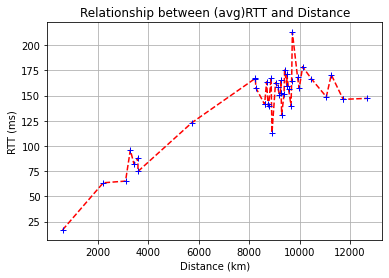

In [11]:
import statistics
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Plotting phase
plt.title('Relationship between (avg)RTT and Distance')
plt.plot(sortedDistances, sortedRtts, '--r')
plt.plot(sortedDistances, sortedRtts, '+b')
plt.xlabel('Distance (km)')
plt.ylabel('RTT (ms)')
plt.grid(visible = True)

**Last step**

The avg RTT per km is: 0.0169 ms
The estimated packet speed is: 118100.86 km/s



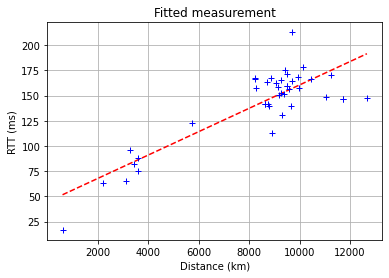

In [12]:
# Fitting phase
line = np.polyfit(sortedDistances, sortedRtts, 1)
poly = np.poly1d(line)

# Plotting phase
plt.title('Fitted measurement')
plt.plot(sortedDistances, poly(sortedDistances), '--r')
plt.plot(sortedDistances, sortedRtts, '+b')
plt.xlabel('Distance (km)')
plt.ylabel('RTT (ms)')
plt.grid(visible = True)

rttPerKm = sum(sortedRtts)/sum(sortedDistances);
print('The avg RTT per km is:', '%.4f' % rttPerKm, 'ms')
print('The estimated packet speed is:', '%.2f' % (sum(sortedDistances)*2/(sum(sortedRtts)/1000)), 'km/s\n')

We obtained an **RTT** that is less or more equal to 1ms every 100km.

We obtained an estimated **packet speed** more or less equal to 120000 km/s. 

Generally speaking, the speed of a packet is influenced by the fact that the packet travels across many transmission systems and equipment, each one with a specific max speed.
In this case, using Google Colab and servers as targets we are establishing communications among 2 servers, so we can assume that the packet travels across optic fibers.
The speed of the light in the void is approximately 299792 km/s, here we got more or less 120000 km/s for two reasons:
1) We are having a transmission across material and not in the void. The light travels slowly across materials compared to what happens in the void.
2) We are considering the distance given by the "geopy.distance.distance" function. This function returns the shortest distance among two points but the packet travels across routing paths defined by the optical fiber cables. Here, using a short distance in our formulas we are underestimating the true speed of the packets.